<p style="font-family: Arial; font-size:2.5em;color:green; font-style:bold"><br>
DSCI 5240 Exam 2 Spring 2025
</p><br>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Kiva.org is a prosocial crowdfunding platform, where people give loans to people in need all over the world. Kiva pursues a mission of poverty alleviation by facilitating crowd-funded interest-free loans for underserved individuals and groups in developing countries. Since its launch in 2005, Kiva has made a total of $1.63 billion loans to more than 4 million borrowers in 77 countries, from more than 1.9 million lenders. Despite its fast growth, Kiva has maintained a surprisingly high repayment rate of 96.2%.
<br>
We collected the data on loans on Kiva. We cleaned the data and the variable information in the current dataset is as follows.<br>
We intend to predict the likelood of a load being funded based on the features.


Variable Explanation <br>
Status -- Whether the loan is funded. Funded – 1; Not funded – 0.<br>
Sector -- The sector the loan is classified to, e.g., agriculture, retail, etc.<br>
Country -- The country of the borrowers<br>
Loan_term -- How long the loan will be paid back, in month<br>
Currency_rate -- The percentage of loss due to currency exchange will be covered<br>
Message -- The number of messages posted by borrowers on Kiva<br>
Repay_interval -- How the repayment will be made: bullet, monthly or irregular<br>
Distribution -- How the loan is distributed: direct or field partner<br>
predisburse -- Whether the loan is distributed before the loan is posted on Kiva: 0 – N; 1 – Y <br>
femalePer -- The percentage of female borrowers <br>
logAmount -- The log of the amount requested. The log base is 2. <br>


In [3]:
# Import the dataset
df = pd.read_csv('/content/KivaSample.csv')
df.head()

,Status,Sector,Country,Currency_rate,Loan_term,Message,Repay_interval,Distribution,predisburse,femalePer,logAmount
0,1,Housing,Indonesia,0.1,48,3,monthly,field_partner,1,1.0,6.214608
1,1,Food,Philippines,0.0,11,1,monthly,field_partner,1,1.0,3.218876
2,1,Services,Uganda,0.1,8,1,monthly,field_partner,1,0.0,5.783825
3,1,Retail,Nicaragua,0.2,12,1,monthly,field_partner,1,1.0,6.684612
4,1,Food,Kenya,0.1,14,2,monthly,field_partner,1,0.0,5.703782


1). Check for basic information. What data types are the variables? Any missing values?

In [4]:
df.info()
df.isnull().sum() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159037 entries, 0 to 159036
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Status          159037 non-null  int64  
 1   Sector          159037 non-null  object 
 2   Country         159037 non-null  object 
 3   Currency_rate   159037 non-null  float64
 4   Loan_term       159037 non-null  int64  
 5   Message         159037 non-null  int64  
 6   Repay_interval  159037 non-null  object 
 7   Distribution    159037 non-null  object 
 8   predisburse     159037 non-null  int64  
 9   femalePer       159037 non-null  float64
 10  logAmount       159037 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 13.3+ MB


,0
Status,0
Sector,0
Country,0
Currency_rate,0
Loan_term,0
Message,0
Repay_interval,0
Distribution,0
predisburse,0
femalePer,0


2) Examine the target variable. Do we need to do anything with the sample?

,count
Status,
0,80237
1,78800


<Axes: xlabel='Status'>

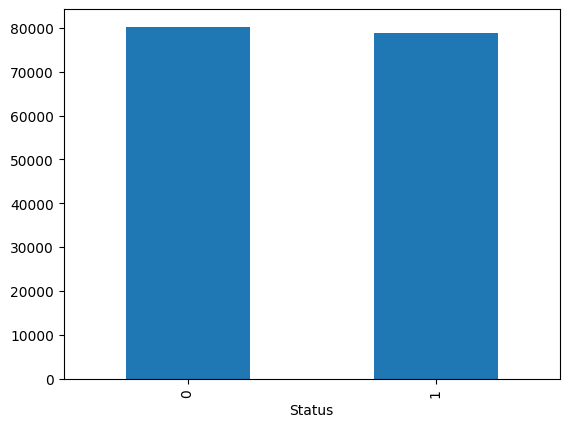

In [5]:
df['Status'].value_counts()
df['Status'].value_counts().plot(kind='bar')
# no need to do anything with the data or the target variable.

3) Find the number of funded loans by country and show it in a graph. Which countries have the most funded loans? (Top 3)

<Axes: xlabel='Country'>

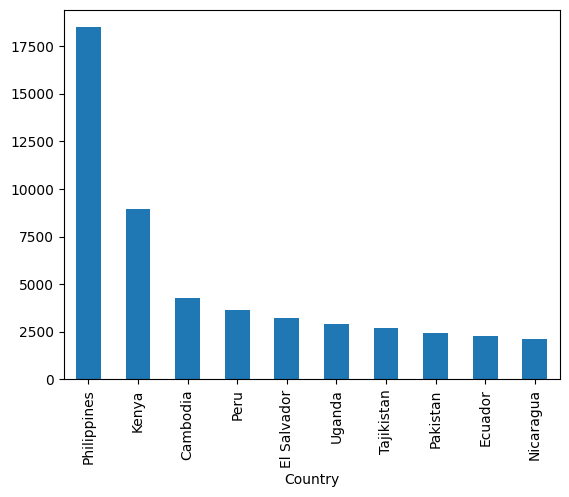

In [6]:
funded_loans = df[df['Status'] == 1]
country_counts = funded_loans['Country'].value_counts().head(10)
country_counts.plot(kind='bar')

<Axes: xlabel='Country'>

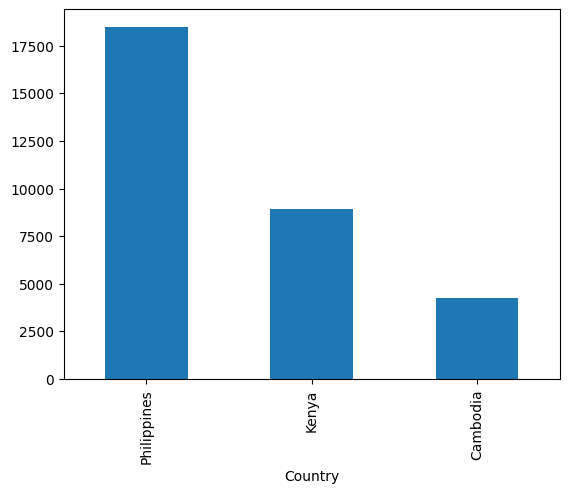

In [7]:
#top 3 countries are Philippines , Kenya and Cambodia
top3_country = funded_loans['Country'].value_counts().head(3)
top3_country.plot(kind='bar')

4). Find the number of loans by Sector and show it in a graph. Which sectors have the most loans? (Top 3)

<Axes: xlabel='Sector'>

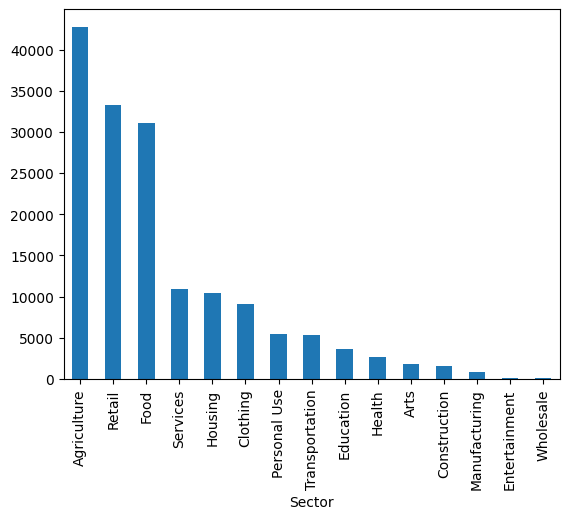

In [8]:
loans_sector = df['Sector'].value_counts()
loans_sector.plot(kind='bar')

<Axes: xlabel='Sector'>

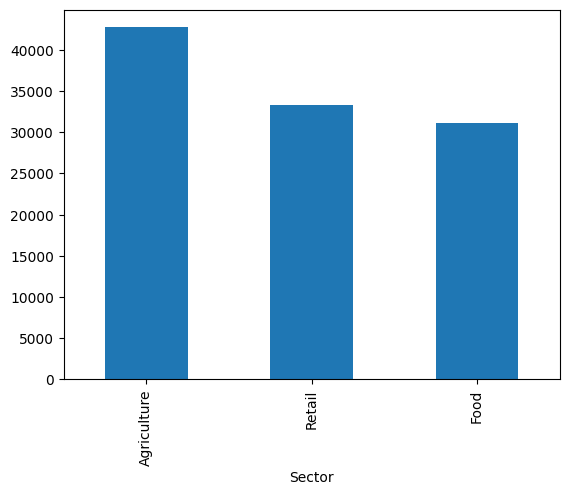

In [9]:
#top 3 countries are Agriculture, Retail and Food
top3_sectors = df['Sector'].value_counts().head(3)
top3_sectors.plot(kind='bar')

5). Examine the relationship between loan term and whether the loan is funded. What do you find?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Status', ylabel='Loan_term'>

Text(0.5, 1.0, 'Loan Term vs. Loan Status')

Text(0.5, 0, 'Loan Status (Funded: 1, Not Funded: 0)')

Text(0, 0.5, 'Loan Term (Months)')

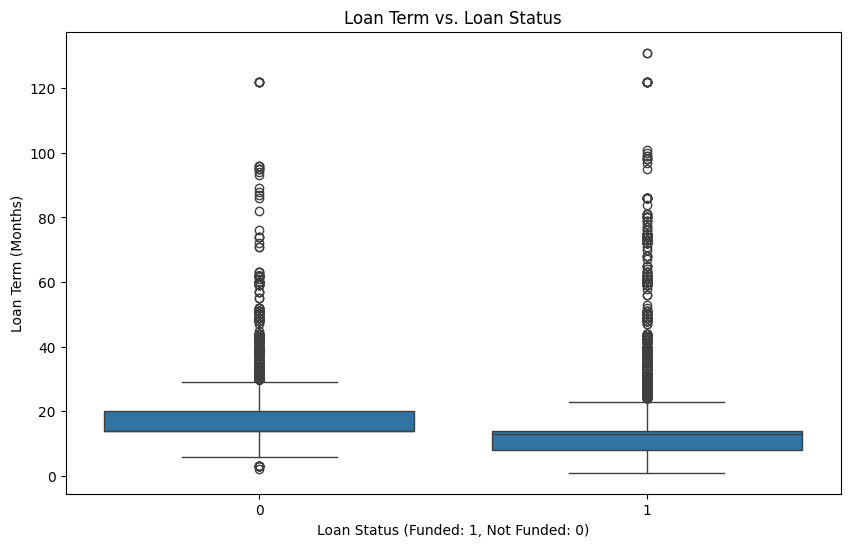

Correlation between Loan Term and Funding Status: -0.3490919294941391


In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Loan_term', data=df)
plt.title('Loan Term vs. Loan Status')
plt.xlabel('Loan Status (Funded: 1, Not Funded: 0)')
plt.ylabel('Loan Term (Months)')
plt.show()

correlation = df['Loan_term'].corr(df['Status'])
print(f"Correlation between Loan Term and Funding Status: {correlation}")

Loans with shorter terms are more likely to be funded, while those with longer terms are less likely to receive funding.

The negative correlation and the boxplot both support the conclusion that longer loan terms decrease the likelihood of funding.

6). Next we will use the features to classify whether a loan is funded. Prepare the data for analysis (Hint: Do not forget to transform categorical variables to dummies).

In [11]:
df1 = df.copy()

In [12]:
categorical_cols = ['Sector','Repay_interval','Country', 'Distribution']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)

X = df.drop(['Status'], axis=1)
y = df['Status']
#
# X.head()
# y.head()

In [13]:
df.columns

Index(['Status', 'Currency_rate', 'Loan_term', 'Message', 'predisburse',
       'femalePer', 'logAmount', 'Sector_Arts', 'Sector_Clothing',
       'Sector_Construction',
       ...
       'Country_Turkey', 'Country_Uganda', 'Country_Ukraine',
       'Country_United States', 'Country_Vanuatu', 'Country_Vietnam',
       'Country_Yemen', 'Country_Zambia', 'Country_Zimbabwe',
       'Distribution_field_partner'],
      dtype='object', length=110)

7). Generate train and test datasets. Test size set to 30%.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

8) Fit a logistic regression model. Which variables are important?<br>

In [15]:
import patsy
y1,x1 = patsy.dmatrices('Status ~ Sector + Currency_rate + Loan_term + Message + predisburse + femalePer + logAmount + Repay_interval + Distribution', data=df1, return_type='dataframe')

x1.head()
y1.head()

import statsmodels.api as sm
model = sm.Logit(y1, x1)
result = model.fit()
result.summary()

# all the variables except Sector[T.Personal Use]

,Intercept,Sector[T.Arts],Sector[T.Clothing],Sector[T.Construction],Sector[T.Education],Sector[T.Entertainment],Sector[T.Food],Sector[T.Health],Sector[T.Housing],Sector[T.Manufacturing],...,Sector[T.Wholesale],Repay_interval[T.irregular],Repay_interval[T.monthly],Distribution[T.field_partner],Currency_rate,Loan_term,Message,predisburse,femalePer,logAmount
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.1,48.0,3.0,1.0,1.0,6.214608
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0,3.218876
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.1,8.0,1.0,1.0,0.0,5.783825
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.2,12.0,1.0,1.0,1.0,6.684612
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.1,14.0,2.0,1.0,0.0,5.703782


,Status
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


Optimization terminated successfully.
         Current function value: 0.388537
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:               159037
Model:                          Logit   Df Residuals:                   159013
Method:                           MLE   Df Model:                           23
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                  0.4394
Time:                        21:49:57   Log-Likelihood:                -61792.
converged:                       True   LL-Null:                   -1.1023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         5.1450      0.124     41.553      0.000       4.902       5.388
Sector[T.Arts]                    2.2117      0.104     21.248      0.000       2.008       2.416
Sector[T.Clothing]               -0.4513      0.033    -13.659      0.000      -0.516      -0.387
Sector[T.Construction]            1.3238      0.073     18.049      0.000       1.180       1.468
Sector[T.Education]               2.3979      0.062     38.757      0.000       2.277       2.519
Sector[T.Entertainment]           1.8599      0.251      7.411      0.000       1.368       2.352
Sector[T.Food]                   -0.2045      0.023     -9.032      0.000      -0.249      -0.160
Sector[T.Health]                  0.3736      0.056      6.707      0.000       0.264       0.483
Sector[T.Housing]                -0.0693      0.032     -2.150      0.032      -0.132      -0.006
Sector[T.Manufacturing]           4.8270      0.296     16.308      0.000       4.247       5.407
Sector[T.Personal Use]            0.0465      0.044      1.050      0.294      -0.040       0.133
Sector[T.Retail]                 -0.6649      0.022    -29.652      0.000      -0.709      -0.621
Sector[T.Services]               -0.1753      0.032     -5.490      0.000      -0.238      -0.113
Sector[T.Transportation]         -0.5856      0.043    -13.511      0.000      -0.671      -0.501
Sector[T.Wholesale]               1.6272      0.294      5.530      0.000       1.051       2.204
Repay_interval[T.irregular]       0.9852      0.040     24.561      0.000       0.907       1.064
Repay_interval[T.monthly]         0.4433      0.027     16.168      0.000       0.390       0.497
Distribution[T.field_partner]     3.1816      0.095     33.322      0.000       2.994       3.369
Currency_rate                    -9.8903      0.171    -57.948      0.000     -10.225      -9.556
Loan_term                        -0.1208      0.002    -78.989      0.000      -0.124      -0.118
Message                           3.6852      0.035    105.487      0.000       3.617       3.754
predisburse                      -0.7424      0.034    -21.966      0.000      -0.809      -0.676
femalePer                         1.0174      0.016     62.747      0.000       0.986       1.049
logAmount                        -1.5347      0.013   -116.294      0.000      -1.561      -1.509
=================================================================================================
"""

In [16]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8534750167672703
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     24169
           1       0.88      0.81      0.85     23543

    accuracy                           0.85     47712
   macro avg       0.86      0.85      0.85     47712
weighted avg       0.86      0.85      0.85     47712



9) Fit a random forest model of 200 trees. How many features do we specify for the random forest? We will use the most frequently used rule. Evaluate the model performance.

In [17]:
model_rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=3, max_features='sqrt')
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42)

Accuracy: 0.837923373574782
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     24169
           1       0.90      0.76      0.82     23543

    accuracy                           0.84     47712
   macro avg       0.85      0.84      0.84     47712
weighted avg       0.85      0.84      0.84     47712



The model is better at identifying loans that are not funded (higher recall for class 0).

It has higher precision for funded loans (class 1), meaning fewer false positives when predicting funding.

The trade-off: the model misses some funded loans (recall 0.76), but when it predicts funding, it is usually correct (precision 0.90).

Overall, the model performs well with balanced precision and recall across both classes.

10) Show variable importance with a graph. Is it consistent with the logistic regression model?

<Figure size 5000x2000 with 0 Axes>

<BarContainer object of 109 artists>

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Feature Importance from Random Forest')

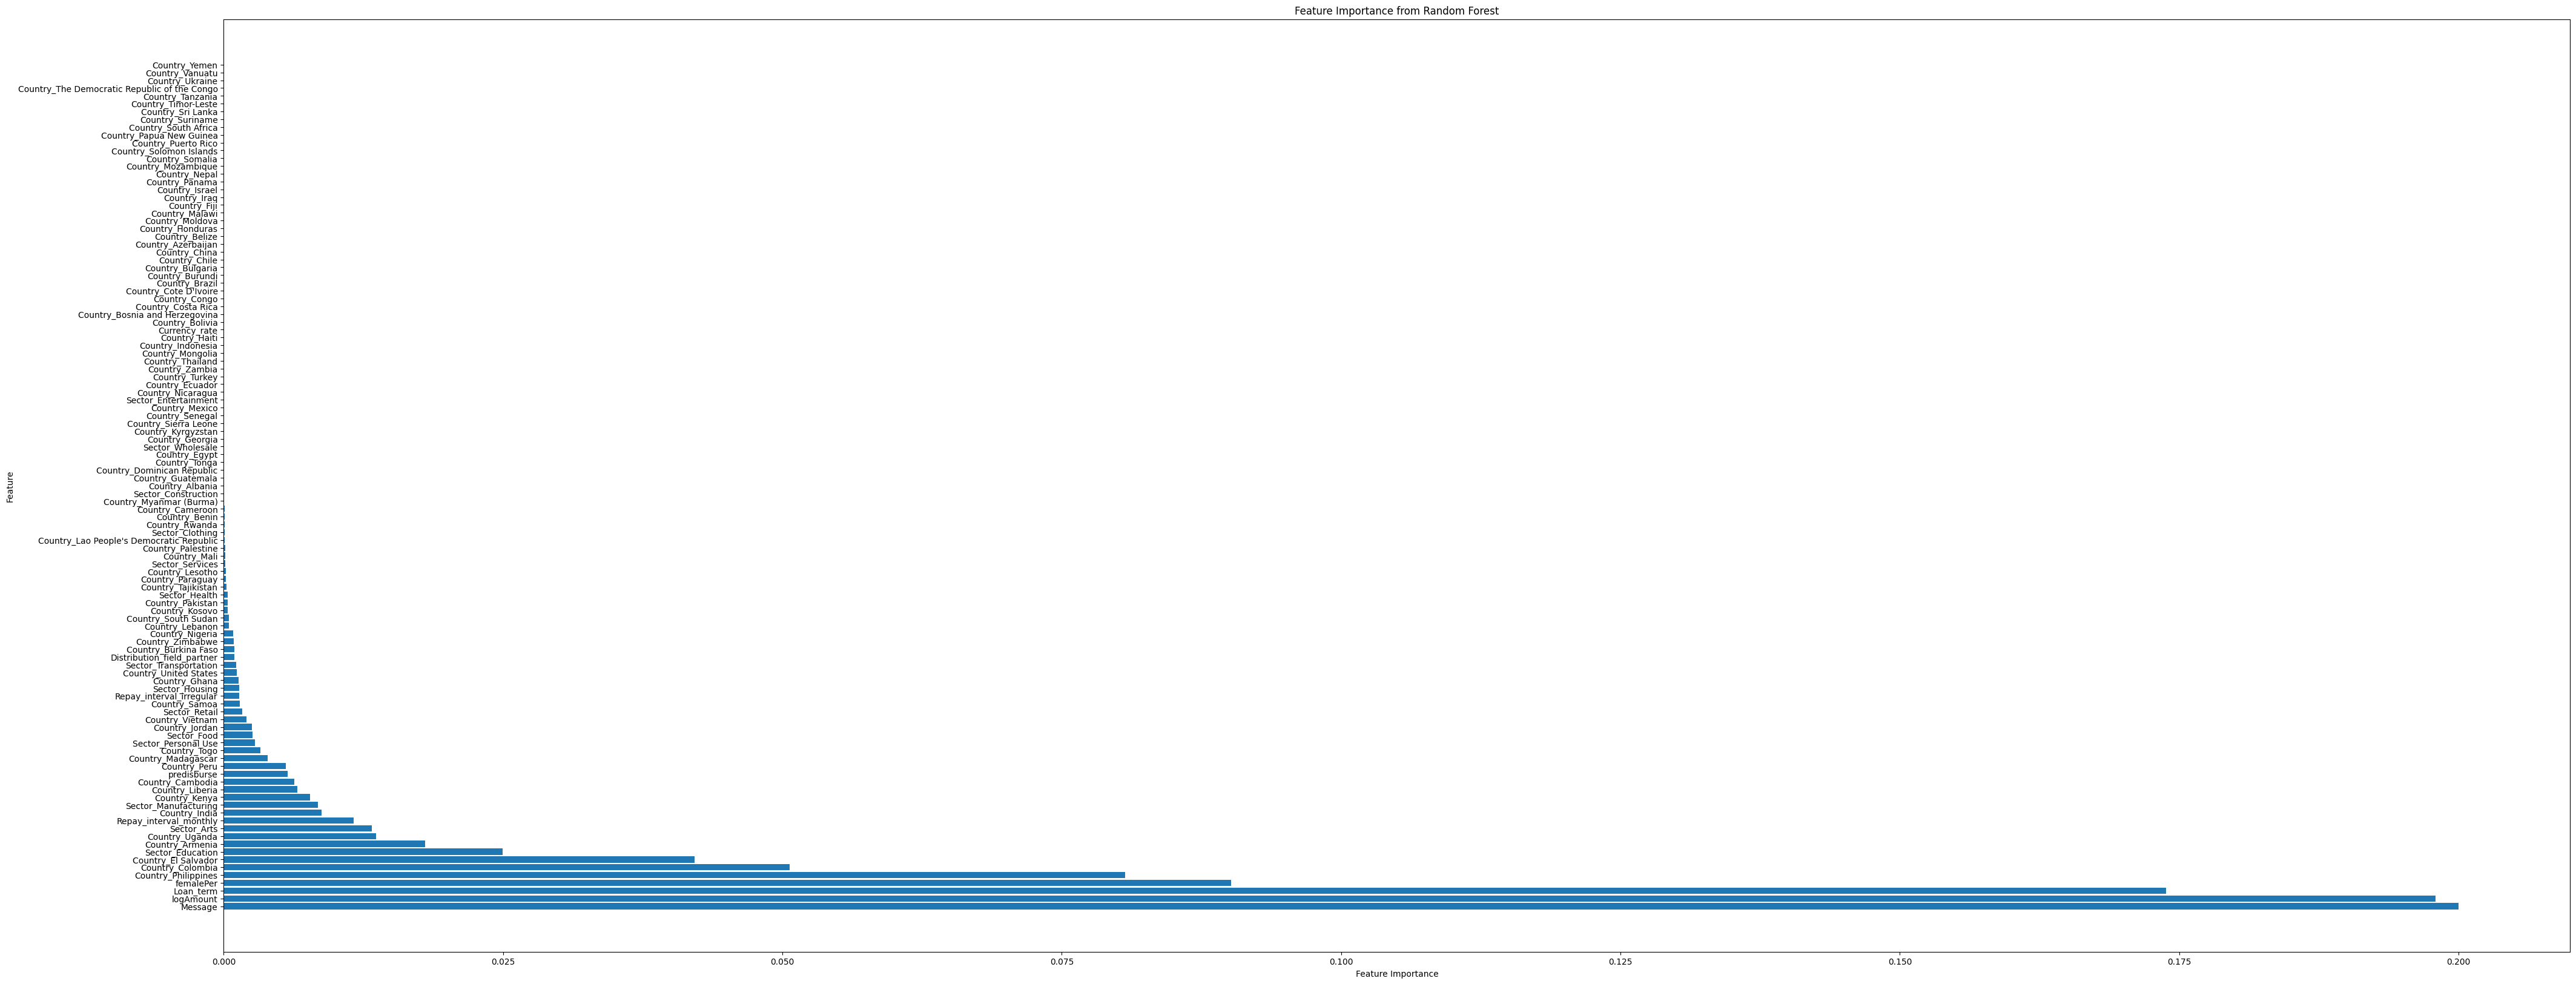


Important features from logistic regression:
['Sector', 'Country', 'Currency_rate', 'Loan_term', 'Message', 'Repay_interval', 'Distribution', 'predisburse', 'femalePer', 'logAmount']

Comparing Random Forest Feature Importance to Logistic Regression
Currency_rate: Present in both models.
Loan_term: Present in both models.
Message: Present in both models.
predisburse: Present in both models.
femalePer: Present in both models.
logAmount: Present in both models.


In [18]:
importances = model_rf.feature_importances_

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Plot the feature importances
plt.figure(figsize=(50,20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

important_logistic_features = ['Sector', 'Country', 'Currency_rate', 'Loan_term', 'Message',
       'Repay_interval', 'Distribution', 'predisburse', 'femalePer',
       'logAmount']

print("\nImportant features from logistic regression:")
print(important_logistic_features)


print("\nComparing Random Forest Feature Importance to Logistic Regression")
for feature in important_logistic_features:
  if feature in feature_importance_df['Feature'].values:
      print(f"{feature}: Present in both models.")

11) Fit a Bayesian model (any type is fine). Evaluate the performance.

In [19]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Gaussian Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = model_nb.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Bayesian model (Naive Bayes): {accuracy_nb}")
print(classification_report(y_test, y_pred_nb))


GaussianNB()

Accuracy of Bayesian model (Naive Bayes): 0.5981094902749833
              precision    recall  f1-score   support

           0       0.56      0.98      0.71     24169
           1       0.93      0.20      0.33     23543

    accuracy                           0.60     47712
   macro avg       0.74      0.59      0.52     47712
weighted avg       0.74      0.60      0.52     47712



Very high recall for not funded loans (0.98) but extremely low recall for funded loans (0.20).

Poor balance and overall performance.

Not suitable for this task.

12) Which model will be your final choice for prediction? (I am not looking for a standard answer. Any answer with logic reasoning is a good answer. Two to three sentences are enough.)

In [20]:
# I will choose Logistic Regrassion

# Highest overall accuracy (85.3%).

# Balanced precision and recall for both classes, especially better recall for funded loans (0.81), which is crucial for identifying loans likely to be funded.

# Random Forest, while strong in detecting non-funded loans, misses more funded loans (lower recall for class 1).

# Naive Bayes performs poorly in detecting funded loans, which is the key target.